In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import datetime

In [75]:
df = pd.read_csv("outputCluster.csv")
del df["Unnamed: 0"]
df.head(10)

,latitude,longitude,Tingkat Kepercayaan (%),label
0,-0.139824,102.882179,42.0,14
1,1.983107,117.390663,59.0,3
2,1.979972,117.368645,66.0,3
3,-0.007676,102.744278,25.0,1
4,0.121050,102.805969,16.0,1
5,0.882921,103.101219,43.0,10
6,0.774409,102.384315,47.0,10
7,0.562346,100.405579,69.0,2
8,0.556807,100.367622,92.0,2
9,0.546775,100.401680,50.0,2


In [76]:
dfRiau = pd.read_csv("extractedRiau.csv")
del dfRiau["Unnamed: 0"]
dfRiau = dfRiau.rename(columns = {"Lintang (deg)":"latitude", "Bujur (deg)":"longitude","Tanggal (dd/mm/yyy)":"Tanggal"})
dfRiau.head(10)

,latitude,longitude,Tanggal,Tingkat Kepercayaan (%),Kecamatan,Kabupaten,Provinsi
0,-0.139824,102.882179,2014-08-04,42.0,Gaunganakserka,Indragiri Hilir,Riau
1,1.983107,117.390663,2014-08-04,59.0,Gaunganakserka,Indragiri Hilir,Riau
2,1.979972,117.368645,2014-08-04,66.0,Gaunganakserka,Indragiri Hilir,Riau
3,-0.007676,102.744278,2014-08-04,25.0,Gaunganakserka,Indragiri Hilir,Riau
4,0.121050,102.805969,2014-08-04,16.0,Gaunganakserka,Indragiri Hilir,Riau
5,0.882921,103.101219,2014-08-04,43.0,Gaunganakserka,Indragiri Hilir,Riau
6,0.774409,102.384315,2014-08-04,47.0,Gaunganakserka,Indragiri Hilir,Riau
7,0.562346,100.405579,2014-08-04,69.0,Rokan Empat Koto,Rokan Hulu,Riau
8,0.556807,100.367622,2014-08-04,92.0,Rokan Empat Koto,Rokan Hulu,Riau
9,0.546775,100.401680,2014-08-04,50.0,Rokan Empat Koto,Rokan Hulu,Riau


In [87]:
# dfRiau.insert(7,"label",df['label'])
dfRiau.head(10)

,latitude,longitude,Tanggal,Tingkat Kepercayaan (%),Kecamatan,Kabupaten,Provinsi,label
0,-0.139824,102.882179,2014-08-04,42.0,Gaunganakserka,Indragiri Hilir,Riau,14
1,1.983107,117.390663,2014-08-04,59.0,Gaunganakserka,Indragiri Hilir,Riau,3
2,1.979972,117.368645,2014-08-04,66.0,Gaunganakserka,Indragiri Hilir,Riau,3
3,-0.007676,102.744278,2014-08-04,25.0,Gaunganakserka,Indragiri Hilir,Riau,1
4,0.121050,102.805969,2014-08-04,16.0,Gaunganakserka,Indragiri Hilir,Riau,1
5,0.882921,103.101219,2014-08-04,43.0,Gaunganakserka,Indragiri Hilir,Riau,10
6,0.774409,102.384315,2014-08-04,47.0,Gaunganakserka,Indragiri Hilir,Riau,10
7,0.562346,100.405579,2014-08-04,69.0,Rokan Empat Koto,Rokan Hulu,Riau,2
8,0.556807,100.367622,2014-08-04,92.0,Rokan Empat Koto,Rokan Hulu,Riau,2
9,0.546775,100.401680,2014-08-04,50.0,Rokan Empat Koto,Rokan Hulu,Riau,2


In [209]:
groupedDf = dfRiau.groupby(['label'])
groupedDf.first()
# groupedDf.to_csv("groupDf.csv")

,latitude,longitude,Tanggal,Tingkat Kepercayaan (%),Kecamatan,Kabupaten,Provinsi
label,,,,,,,
0,1.095043,100.986351,2014-08-09,99.0,Pinggir,Bengkalis,Riau
1,-0.007676,102.744278,2014-08-04,25.0,Gaunganakserka,Indragiri Hilir,Riau
2,0.562346,100.405579,2014-08-04,69.0,Rokan Empat Koto,Rokan Hulu,Riau
3,1.983107,117.390663,2014-08-04,59.0,Gaunganakserka,Indragiri Hilir,Riau
4,2.123400,100.357933,2014-08-05,96.0,Bagan Sinembah,Rokan Hilir,Riau
5,1.576472,101.123093,2014-08-04,18.0,Tanah Putih,Rokan Hilir,Riau
6,-8.000000,125.059875,2014-08-07,60.0,Bukit Kapur,Kota Dumai,Riau
7,2.114357,100.359222,2014-08-05,100.0,Bagan Sinembah,Rokan Hilir,Riau
8,-0.157212,99.798149,2014-08-09,65.0,Pangkalan Kuras,Pelalawan,Riau


In [261]:
cluster0 = groupedDf.get_group(8)
# cluster0.Date.dt.strftime('%Y%m%d').astype(int)

# cluster0["Tanggal"].isna().sum()
cluster0['Tanggal'] = cluster0['Tanggal'].str.replace('-','')

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [264]:
for i in range(9,20):
    clusteri = groupedDf.get_group(i)
    clusteri['Tanggal'] = clusteri['Tanggal'].str.replace('-','')
    clusteri = clusteri[clusteri.Tanggal !=0]
    clusteri['Tanggal'] = pd.to_datetime(clusteri['Tanggal'], format="%Y%m%d",errors="coerce")
    clusteri=clusteri.sort_values(by ='Tanggal')
    exportToCsv0 = clusteri.groupby([clusteri.Tanggal.dt.year, clusteri.Tanggal.dt.month]).agg({'count'})
    exportToCsv0.to_csv("cluster_"+str(i)+"_Arima.csv")

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [257]:
cluster0.head(10)
# cluster0['Tanggal'] = cluster0['Tanggal'].astype(int)
# cluster0['Tanggal'
# isZero = cluster0['Tanggal'] == 0
# dataZero = cluster0[isZero]
# cluster0 = cluster0[cluster0.Tanggal ==0]
# cluster0.head()
cluster0 = cluster0[cluster0.Tanggal !=0]

In [258]:
cluster0['Tanggal'] = pd.to_datetime(cluster0['Tanggal'], format="%Y%m%d",errors="coerce")
# cluster0 = cluster0.sort_values(by=['Tanggal'])
cluster0['Tanggal'].unique()

array(['2014-08-09T00:00:00.000000000', '2014-08-12T00:00:00.000000000',
       '2014-08-16T00:00:00.000000000', '2018-08-11T00:00:00.000000000',
       '2018-08-13T00:00:00.000000000', '2018-08-15T00:00:00.000000000',
       '2018-08-16T00:00:00.000000000', '2018-08-18T00:00:00.000000000',
       '2018-08-20T00:00:00.000000000', '2018-08-21T00:00:00.000000000',
       '2018-08-23T00:00:00.000000000', '2018-08-27T00:00:00.000000000',
       '2018-08-19T00:00:00.000000000', '2016-08-03T00:00:00.000000000',
       '2016-08-06T00:00:00.000000000', '2016-08-08T00:00:00.000000000',
       '2016-08-13T00:00:00.000000000', '2016-08-14T00:00:00.000000000',
       '2016-08-16T00:00:00.000000000', '2016-08-17T00:00:00.000000000',
       '2016-08-18T00:00:00.000000000', '2016-08-23T00:00:00.000000000',
       '2016-08-26T00:00:00.000000000', '2017-08-03T00:00:00.000000000',
       '2017-08-05T00:00:00.000000000', '2017-08-06T00:00:00.000000000',
       '2017-08-16T00:00:00.000000000', '2017-08-20

In [259]:
cluster0=cluster0.sort_values(by ='Tanggal')
# totalTgl = []
# for tgl in cluster0['Tanggal']:
#     isTgl = cluster0['Tanggal'] == tgl
#     data = cluster0[isTgl]
#     totalTgl.append(data.latitude.count())


In [260]:
exportToCsv0 = cluster0.groupby([cluster0.Tanggal.dt.year, cluster0.Tanggal.dt.month]).agg({'count'})
exportToCsv0.to_csv("cluster8Arima.csv")

In [163]:
# dataExport = exportToCsv0[['Tanggal','Tanggal','Tanggal count']
exportToCsv0.head()

latitude longitude Tanggal Tingkat Kepercayaan (%) Kecamatan  \
                   count     count   count                   count     count   
Tanggal Tanggal                                                                
2014    1              1         1       1                       1         1   
        2            115       115     115                     115       115   
        3            185       185     185                     185       185   
        6             10        10      10                      10        10   
        7              6         6       6                       6         6   

                Kabupaten Provinsi  
                    count    count  
Tanggal Tanggal                     
2014    1               1        1  
        2             115      115  
        3             185      185  
        6              10       10  
        7               6        6

C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


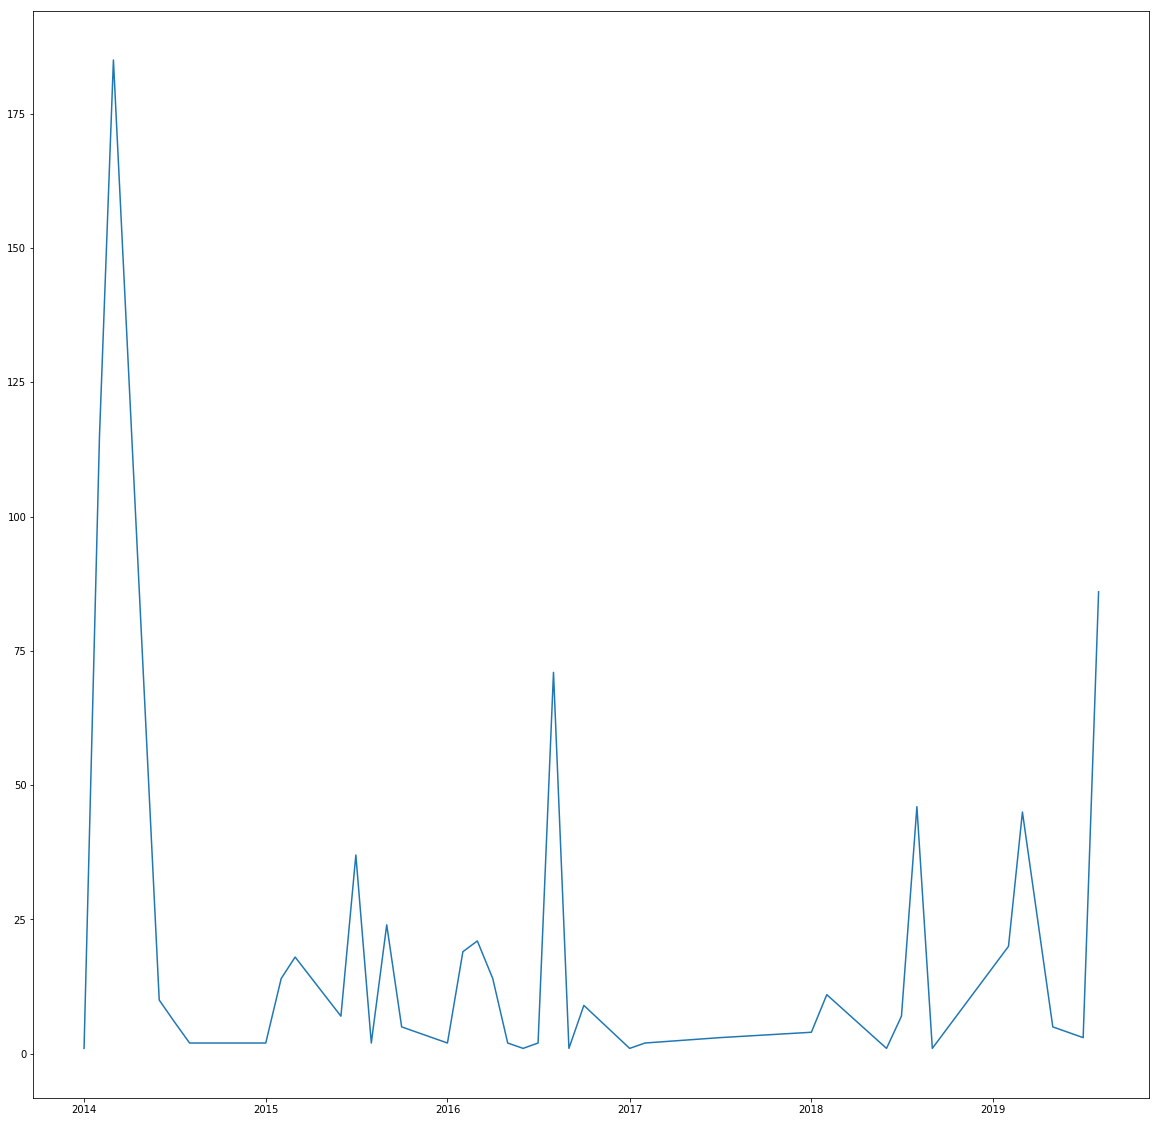

In [181]:
datacluster0 = pd.read_csv("cluster0Arima.csv")
datacluster0.Tahun = pd.to_datetime(datacluster0.Tahun, format="%Y%m")
# df.pivot(index='Tahun', columns='count', values='count').plot(marker='o')
x = datacluster0['Tahun']
# print(x)
y = datacluster0['count']
datacluster0.head()
plt.figure(figsize=(20,20))
plt.plot(x,y)

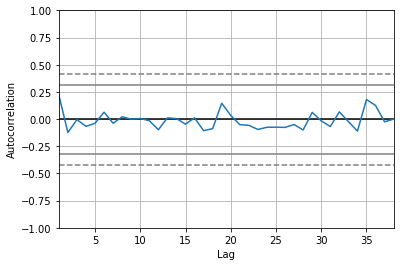

In [190]:
from pandas.plotting import autocorrelation_plot
series = pd.read_csv('cluster0Arima.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
autocorrelation_plot(series)
plt.show()
# arima = ARIMA(datacluster0, order=())

C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                   37
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -185.625
Method:                       css-mle   S.D. of innovations             34.870
Date:                Thu, 26 Sep 2019   AIC                            383.250
Time:                        19:14:25   BIC                            392.915
Sample:                             1   HQIC                           386.657
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5405      0.673     -0.803      0.428      -1.859       0.778
ar.L1.D.count     0.3185      0.180      1.768      0.087      -0.035       0.671
ar.L2.D.count    -0.2646      0.189     

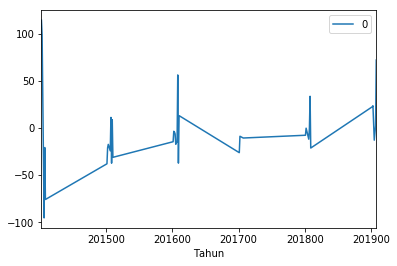

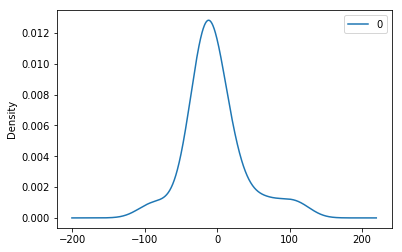

                0
count   37.000000
mean    -3.097602
std     40.140420
min    -95.425236
25%    -20.963579
50%    -10.551826
75%      8.833990
max    114.540549


In [201]:
model = ARIMA(series, order=(3,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())